<a href="https://colab.research.google.com/github/ramaoutlook/AI-ML-GENAI-NLP-LLM-Projects/blob/main/Deep%20Learning%20Projects/CIFAR10-ImageClassification-ANN/Image_Classification_wiht_ANN_GPU_bench_marking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# fashion_mnist = keras.datasets.fashion_mnist
# (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.test.is_built_with_cuda

<function tensorflow.python.platform.test.is_built_with_cuda()>

In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
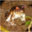

In [7]:
X_train[0]

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [10]:
def plot_sample(index):
  plt.figure(figsize=(10,1))
  plt.imshow(X_train[index])

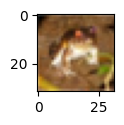

In [12]:
plot_sample(0)

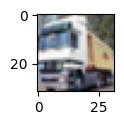

In [13]:
plot_sample(1)

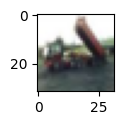

In [14]:
plot_sample(2)

In [15]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

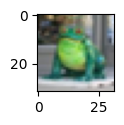

In [16]:
plot_sample(19)

In [18]:
y_train[3]

array([4], dtype=uint8)

In [19]:
classes[y_train[3][0]]

'deer'

In [21]:
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [22]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [23]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [24]:
y_test[:10]

array([[3],
       [8],
       [8],
       [0],
       [6],
       [6],
       [1],
       [6],
       [3],
       [1]], dtype=uint8)

In [26]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [27]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10
)
y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]])

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid'),
])

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs=50)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.3061 - loss: 1.9277
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4244 - loss: 1.6340
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4562 - loss: 1.5412
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.4780 - loss: 1.4833
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.4941 - loss: 1.4321
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5095 - loss: 1.3950
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5290 - loss: 1.3411
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5467 - loss: 1.2987
Epoch 9/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5553 - loss: 1.2755
Epoch 10/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5628 - loss: 1.2480
Epoch 11/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5764 - loss: 1.2129
Epoch 12/50
1563/1563 ━━━

In [29]:
classes[np.argmax(model.predict(X_test_scaled)[1])]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


'ship'

In [30]:
np.argmax(model.predict(X_test_scaled)[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


np.int64(8)

In [31]:
classes[y_test[1][0]]

'ship'

In [32]:
def get_model():
  model = keras.Sequential([
      keras.layers.Flatten(input_shape=(32,32,3)),
      keras.layers.Dense(3000, activation='relu'),
      keras.layers.Dense(3000, activation='relu'),
      keras.layers.Dense(10, activation='sigmoid'),
  ])

  model.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [33]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
  cpuu_model = get_model()
  cpuu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 150s 96ms/step - accuracy: 0.3045 - loss: 1.9333
3min 23s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [34]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
  gpu_model = get_model()
  gpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3062 - loss: 1.9251
9.62 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


# CIFAR-10 Image Classification with TensorFlow/Keras

This project demonstrates a simple image classification model built using TensorFlow and Keras to classify images from the CIFAR-10 dataset.

## Dataset

The CIFAR-10 dataset consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images. The classes are:

*   airplane
*   automobile
*   bird
*   cat
*   deer
*   dog
*   frog
*   horse
*   ship
*   truck

## Project Steps

1.  **Load the dataset:** The CIFAR-10 dataset is loaded using `tf.keras.datasets.cifar10.load_data()`.
2.  **Data Exploration:** Basic exploration of the dataset is performed to understand the shape and content of the images and labels.
3.  **Data Preprocessing:** The image data is scaled by dividing by 255 to normalize the pixel values between 0 and 1. The labels are converted to categorical format using `keras.utils.to_categorical`.
4.  **Model Definition:** A simple sequential model is defined using Keras. The model consists of:
    *   A `Flatten` layer to flatten the 32x32x3 images into a 1D array.
    *   Two `Dense` layers with 3000 neurons and ReLU activation.
    *   A final `Dense` layer with 10 neurons (one for each class) and sigmoid activation.
5.  **Model Compilation:** The model is compiled with the SGD optimizer, categorical crossentropy loss function, and accuracy as the evaluation metric.
6.  **Model Training:** The model is trained on the scaled training data for 50 epochs.
7.  **Model Evaluation:** (This step was not explicitly shown in the provided code, but would typically follow training to evaluate the model's performance on the test set.)
8.  **Prediction:** The trained model is used to make predictions on the test set.

## Algorithms Used

*   **Deep Neural Network (DNN):** The core of the model is a simple feedforward deep neural network with multiple dense layers.
*   **Stochastic Gradient Descent (SGD):** This optimization algorithm is used to train the model by iteratively updating the model's weights based on the gradient of the loss function.
*   **Categorical Crossentropy:** This is the loss function used for multi-class classification problems like CIFAR-10. It measures the difference between the predicted class probabilities and the true class labels.
*   **ReLU Activation:** The Rectified Linear Unit activation function is used in the hidden layers to introduce non-linearity into the model.
*   **Sigmoid Activation:** The sigmoid activation function is used in the output layer to produce probability values for each class.

## How to Run

1.  Ensure you have TensorFlow and Keras installed.
2.  Run the code cells in the provided notebook sequentially.